# Data Wrangling

In [246]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
rcParams['figure.figsize'] = (7,5)
rcParams['figure.dpi'] = 120
rcParams['savefig.dpi'] = 120 

rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
matplotlib.style.use('ggplot')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import missingno as msno
import sklearn
%matplotlib inline

### loading player stats data

In [247]:
players = pd.read_csv("stats.csv.gz",index_col=0)
print(players.shape)
players.head()


(649, 29)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26.0,OKC,58.0,58.0,1564.0,262.0,443.0,0.591,...,0.590,196.0,347.0,543.0,141.0,50.0,65.0,86.0,111.0,633.0
1,Bam Adebayo,PF,22.0,MIA,65.0,65.0,2235.0,408.0,719.0,0.567,...,0.690,165.0,518.0,683.0,333.0,78.0,85.0,185.0,164.0,1053.0
2,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,1754.0,391.0,793.0,0.493,...,0.827,103.0,289.0,392.0,129.0,36.0,87.0,74.0,128.0,1001.0
3,Nickeil Alexander-Walker,SG,21.0,NOP,41.0,0.0,501.0,77.0,227.0,0.339,...,0.607,8.0,72.0,80.0,74.0,11.0,7.0,40.0,46.0,211.0
4,Grayson Allen,SG,24.0,MEM,30.0,0.0,498.0,79.0,176.0,0.449,...,0.857,5.0,61.0,66.0,43.0,6.0,1.0,23.0,36.0,221.0


### loading salary data

In [248]:
raw_salary = pd.read_csv("salary.csv.gz",index_col=0)
print(raw_salary.shape)
raw_salary.head()

(564, 4)


,RK,NAME,TEAM,SALARY
0,1,"Stephen Curry, PG",Golden State Warriors,"$40,231,758"
1,2,"Chris Paul, PG",Oklahoma City Thunder,"$38,506,482"
2,3,"Russell Westbrook, PG",Houston Rockets,"$38,506,482"
3,4,"John Wall, PG",Washington Wizards,"$38,199,000"
4,5,"Kevin Durant, SF",Brooklyn Nets,"$38,199,000"


### I  just need player name and salary for this report. The salary formate need change to normal numbers

In [249]:
raw_salary['full-name'], raw_salary['Position'] = raw_salary['NAME'].str.split(',', 1).str
raw_salary.head()

,RK,NAME,TEAM,SALARY,full-name,Position
0,1,"Stephen Curry, PG",Golden State Warriors,"$40,231,758",Stephen Curry,PG
1,2,"Chris Paul, PG",Oklahoma City Thunder,"$38,506,482",Chris Paul,PG
2,3,"Russell Westbrook, PG",Houston Rockets,"$38,506,482",Russell Westbrook,PG
3,4,"John Wall, PG",Washington Wizards,"$38,199,000",John Wall,PG
4,5,"Kevin Durant, SF",Brooklyn Nets,"$38,199,000",Kevin Durant,SF


In [250]:
def covert_currency(x): #1change salary formate
    if x == 0:
        return 0
    else:
        return x.replace("$","").replace(",","")
    
cust_str = raw_salary['SALARY'].apply(lambda x:covert_currency(x)) #2

raw_salary['SALARY'] = pd.to_numeric(cust_str, errors='coerce')

In [251]:
# salary = raw_salary[['full-name','SALARY','Position']]
salary = raw_salary[['full-name','SALARY']]

In [252]:
salary = salary.rename(columns={'full-name':'Player','SALARY':'Salary'})
print(salary.shape)
salary.head()

(564, 2)


,Player,Salary
0,Stephen Curry,40231758.0
1,Chris Paul,38506482.0
2,Russell Westbrook,38506482.0
3,John Wall,38199000.0
4,Kevin Durant,38199000.0


## merging

### merging and concatenation 2 datasets

In [253]:
df = pd.merge(salary,players,on="Player",how='outer')
print(df.shape)
df.head()

(807, 30)


,Player,Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,40231758.0,PG,31.0,GSW,5.0,5.0,139.0,33.0,82.0,...,1.000,4.0,22.0,26.0,33.0,5.0,2.0,16.0,11.0,104.0
1,Chris Paul,38506482.0,PG,34.0,OKC,63.0,63.0,2003.0,394.0,805.0,...,0.900,21.0,289.0,310.0,426.0,98.0,9.0,137.0,139.0,1114.0
2,Russell Westbrook,38506482.0,PG,31.0,HOU,53.0,53.0,1905.0,568.0,1199.0,...,0.777,94.0,332.0,426.0,370.0,88.0,17.0,236.0,187.0,1456.0
3,John Wall,38199000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kevin Durant,38199000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df.columns

Index(['Player', 'Salary', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [255]:
merge_data = df.groupby('Player').agg({col:'max' for col in df.columns})
# merge_data = merge_data.drop(['Player','Pos','Tm'], axis=1)
merge_data = merge_data.drop(['Player'], axis=1)

merge_data = merge_data.loc[:, ~merge_data.columns.str.contains('^Unnamed')]
merge_data = merge_data.rename(columns={'3P':'P3','3P%':'P3%','2P':'P2','2P%':'P2%','2PA':'P2A'})
# merge_data.columns

### I got a 634 column record and 29 feature dataset.

In [256]:
print(merge_data.shape)
merge_data.head()


(634, 29)


,Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,19863636.0,PF,24.0,ORL,58.0,58.0,1914.0,314.0,726.0,0.433,...,0.675,103.0,338.0,441.0,215.0,50.0,36.0,94.0,116.0,833.0
Aaron Holiday,2329200.0,PG,23.0,IND,58.0,26.0,1368.0,202.0,496.0,0.407,...,0.861,21.0,111.0,132.0,193.0,45.0,13.0,75.0,102.0,546.0
Aaron Jackson,1378242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abdel Nader,1618520.0,SF,26.0,OKC,48.0,5.0,756.0,100.0,220.0,0.455,...,0.774,14.0,76.0,90.0,35.0,20.0,20.0,36.0,65.0,287.0
Adam Mokoka,NaN,SG,21.0,CHI,11.0,0.0,112.0,12.0,28.0,0.429,...,0.500,7.0,3.0,10.0,4.0,4.0,0.0,2.0,17.0,32.0


### dataset Persistence

In [257]:
merge_data.to_csv("raw_players_salary.csv.gz", compression='gzip')

## Wrangling

In [258]:
raw_players_salary = pd.read_csv("raw_players_salary.csv.gz")
print(raw_players_salary.shape)
raw_players_salary.head()

(634, 30)


,Player,Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,19863636.0,PF,24.0,ORL,58.0,58.0,1914.0,314.0,726.0,...,0.675,103.0,338.0,441.0,215.0,50.0,36.0,94.0,116.0,833.0
1,Aaron Holiday,2329200.0,PG,23.0,IND,58.0,26.0,1368.0,202.0,496.0,...,0.861,21.0,111.0,132.0,193.0,45.0,13.0,75.0,102.0,546.0
2,Aaron Jackson,1378242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdel Nader,1618520.0,SF,26.0,OKC,48.0,5.0,756.0,100.0,220.0,...,0.774,14.0,76.0,90.0,35.0,20.0,20.0,36.0,65.0,287.0
4,Adam Mokoka,NaN,SG,21.0,CHI,11.0,0.0,112.0,12.0,28.0,...,0.500,7.0,3.0,10.0,4.0,4.0,0.0,2.0,17.0,32.0


In [259]:
raw_players_salary.columns

Index(['Player', 'Salary', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', 'P3', '3PA', 'P3%', 'P2', 'P2A', 'P2%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

### The char map show missing value.

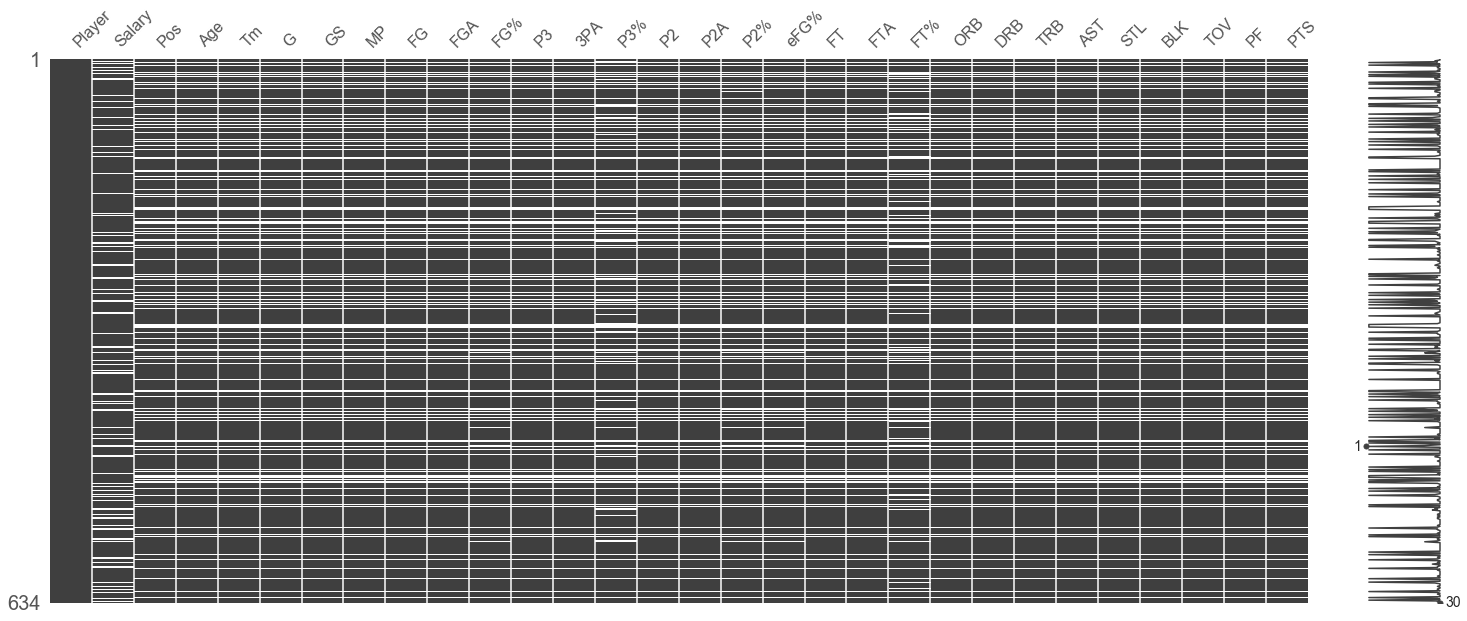

In [260]:
msno.matrix(raw_players_salary.sample(raw_players_salary.shape[0])) # check None value

# todo 对于缺失值处理

In [261]:
clear_players_salary = raw_players_salary.dropna()

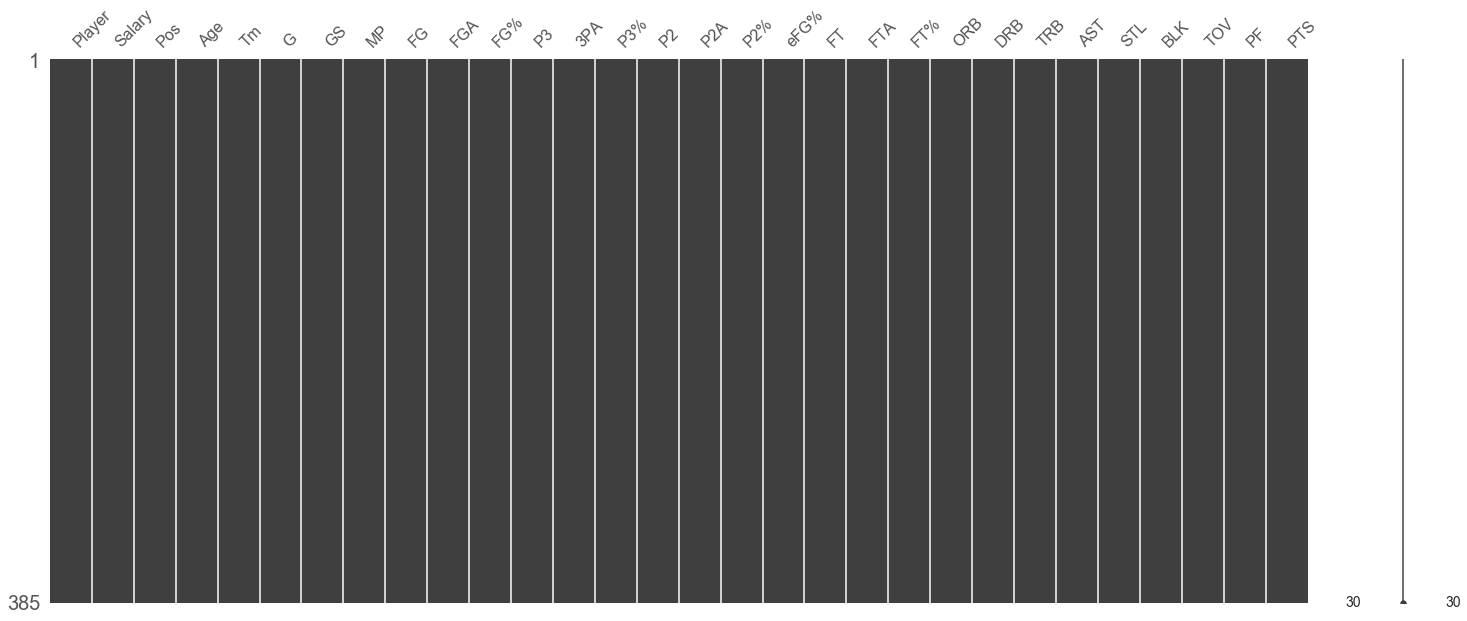

In [262]:
# clear_players_salary_with_mean = raw_players_salary.fillna(df.mean())
# clear_players_salary = clear_players_salary_with_mean.fillna(0)
msno.matrix(clear_players_salary.sample(clear_players_salary.shape[0])) 

In [263]:
clear_players_salary.shape

(385, 30)

### There is no duplicate player in the dataset

In [264]:
clear_players_salary['Player'].duplicated().sum() 


0

### The statistics show that mean, max, min of each feature. We could get the information about players 
such as xxx and xxxx of players usually are xxx and xxx.

clear_players_salary.head()

In [265]:
clear_players_salary.describe()

,Salary,Age,G,GS,MP,FG,FGA,FG%,P3,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,3.850000e+02,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,7.849734e+06,25.836364,45.927273,22.581818,1075.231169,181.641558,397.418182,0.457429,54.659740,152.961039,...,0.763894,42.727273,150.597403,193.324675,110.389610,34.711688,21.132468,62.012987,90.392208,496.251948
std,9.024784e+06,4.199048,16.590971,23.185600,615.731595,138.692579,295.761604,0.089461,51.079147,133.196698,...,0.129042,40.523924,110.281914,144.054030,107.104646,24.603470,23.014841,50.257435,49.734707,389.217152
min,3.501890e+05,19.000000,2.000000,0.000000,6.000000,1.000000,3.000000,0.143000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,1.620564e+06,22.000000,35.000000,2.000000,527.000000,74.000000,171.000000,0.410000,14.000000,43.000000,...,0.697000,16.000000,66.000000,86.000000,36.000000,14.000000,6.000000,25.000000,47.000000,191.000000
50%,3.623000e+06,25.000000,51.000000,13.000000,1061.000000,153.000000,323.000000,0.448000,41.000000,119.000000,...,0.779000,29.000000,129.000000,162.000000,74.000000,31.000000,15.000000,49.000000,91.000000,414.000000
75%,1.025938e+07,29.000000,59.000000,46.000000,1592.000000,259.000000,578.000000,0.489000,81.000000,222.000000,...,0.843000,57.000000,214.000000,266.000000,143.000000,51.000000,28.000000,84.000000,126.000000,692.000000
max,4.023176e+07,43.000000,66.000000,65.000000,2243.000000,623.000000,1386.000000,1.000000,271.000000,769.000000,...,1.000000,250.000000,653.000000,869.000000,636.000000,115.000000,187.000000,289.000000,246.000000,2096.000000


### The map shows salary of player has hug gap. 

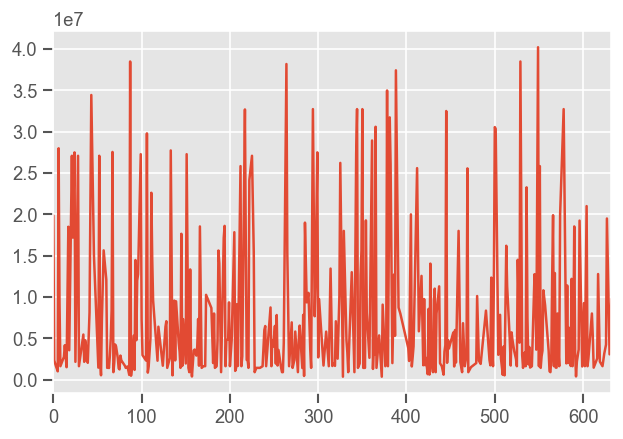

<Figure size 2640x2400 with 0 Axes>

In [271]:
clear_players_salary['Salary'].plot() # salary 
plt.figure(figsize=(22, 20))
plt.rcParams['savefig.dpi'] = 120 
plt.rcParams['figure.dpi'] = 120 
plt.show()

In [270]:
clear_players_salary.to_csv("clear_players_salary.csv.gz", compression='gzip')

In [237]:
clear_players_salary = pd.read_csv("clear_players_salary.csv.gz",index_col=0)
clear_players_salary.head()

,Player,Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,19863636.0,PF,24.0,ORL,58.0,58.0,1914.0,314.0,726.0,...,0.675,103.0,338.0,441.0,215.0,50.0,36.0,94.0,116.0,833.0
1,Aaron Holiday,2329200.0,PG,23.0,IND,58.0,26.0,1368.0,202.0,496.0,...,0.861,21.0,111.0,132.0,193.0,45.0,13.0,75.0,102.0,546.0
3,Abdel Nader,1618520.0,SF,26.0,OKC,48.0,5.0,756.0,100.0,220.0,...,0.774,14.0,76.0,90.0,35.0,20.0,20.0,36.0,65.0,287.0
5,Admiral Schofield,1000000.0,SF,22.0,WAS,27.0,2.0,293.0,30.0,75.0,...,0.692,6.0,28.0,34.0,14.0,8.0,3.0,7.0,41.0,83.0
6,Al Horford,28000000.0,C,33.0,PHI,60.0,57.0,1848.0,289.0,654.0,...,0.753,92.0,320.0,412.0,244.0,52.0,55.0,65.0,128.0,722.0


### we can find the mean of salary is 7849734, however the max of salary is 40231758

In [272]:
print(clear_players_salary['Salary'].mean())
clear_players_salary['Salary'].max()

7849734.155844156


40231758.0

### top 10

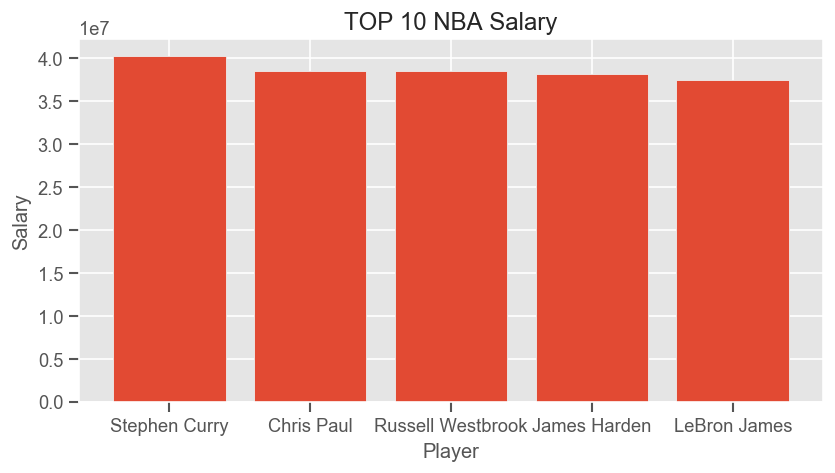

In [276]:
top10 =  clear_players_salary.sort_values("Salary",ascending=False).head()

plt.figure(figsize=(8,4))

plt.bar(top10.Player,top10.Salary)
plt.ylabel("Salary")
plt.xlabel("Player")
plt.title("TOP 10 NBA Salary")
# plt.xticks(rotation=70)

plt.show()

In [128]:
### 各个位置球员人数统计

In [277]:
# clear_players_salary['Position'].value_counts()
clear_players_salary['Pos'].value_counts()


SG       105
PF        77
PG        71
SF        68
C         63
SF-PF      1
Name: Pos, dtype: int64

### Visualizing the distribution of the dataset and We could get the father information that the 大部分分布在 1000000 一下

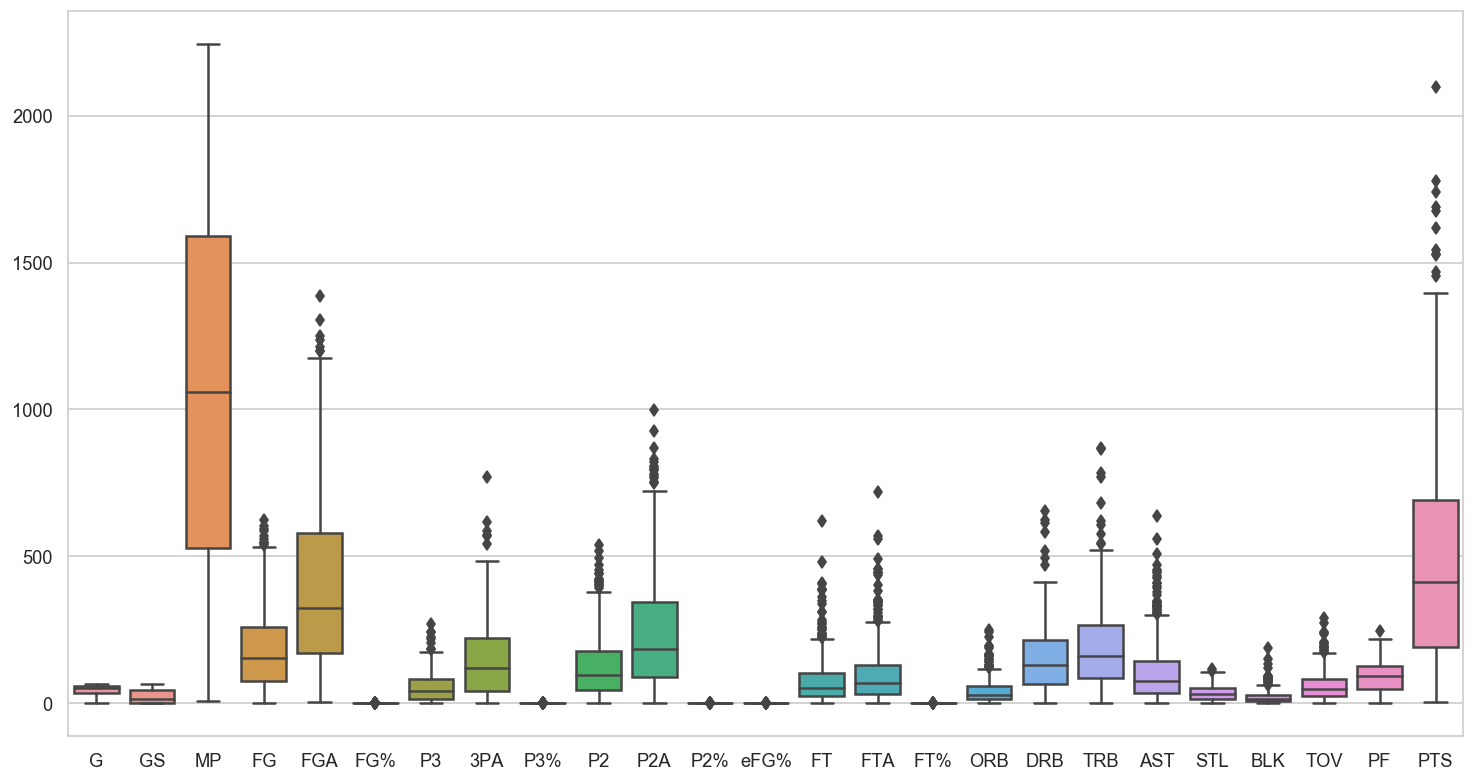

In [278]:
plt.figure(figsize=(15, 8))
df = clear_players_salary.iloc[:, 4:].copy()


sns.set_style("whitegrid")
sns.boxplot(data=df[list(df.columns)])


/Users/Tommy/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0.5, 0, 'SALARY')

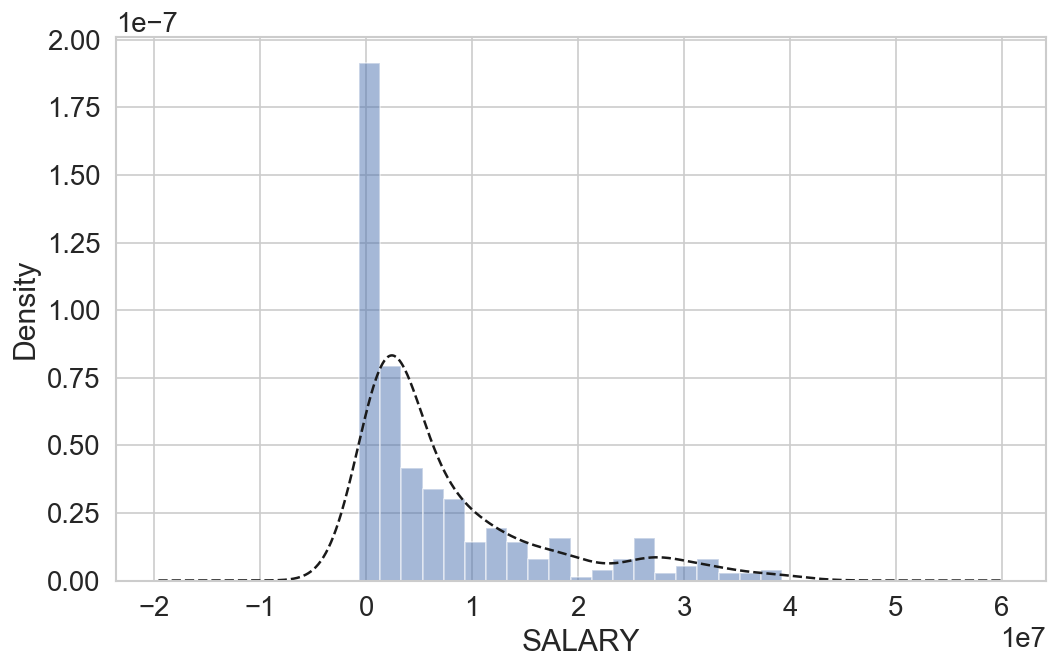

In [279]:
#球员薪水的分布密度图
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
clear_players_salary['Salary'].hist(bins = 20,
       histtype = 'bar',
       align = 'left',
       orientation = 'vertical',
       alpha=0.5,
       normed =True)
clear_players_salary['Salary'].plot(kind='kde',style='k--')
plt.xlabel('SALARY') #Absolute value(1e7):10000000.


### 在三千万薪水之上没有中锋和得分后卫，大前锋最多。这也符合联盟现状，得分后卫和中锋的相对凋零。

### （大前锋和中锋的平均工资较高，但大前锋的拿顶薪数量更多，也就是优质的PF在球队地位更高）
PG 控球后位 （Point Guard）
PF 大前锋（Power Forward）
SF 小前锋（Small Forward）
SG 得分后位（Shooting Guard）
C  中锋 Center

SF-PF 锋卫摇摆人  Swingman 人数少，要求技术较高。

/Users/Tommy/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x720 with 0 Axes>

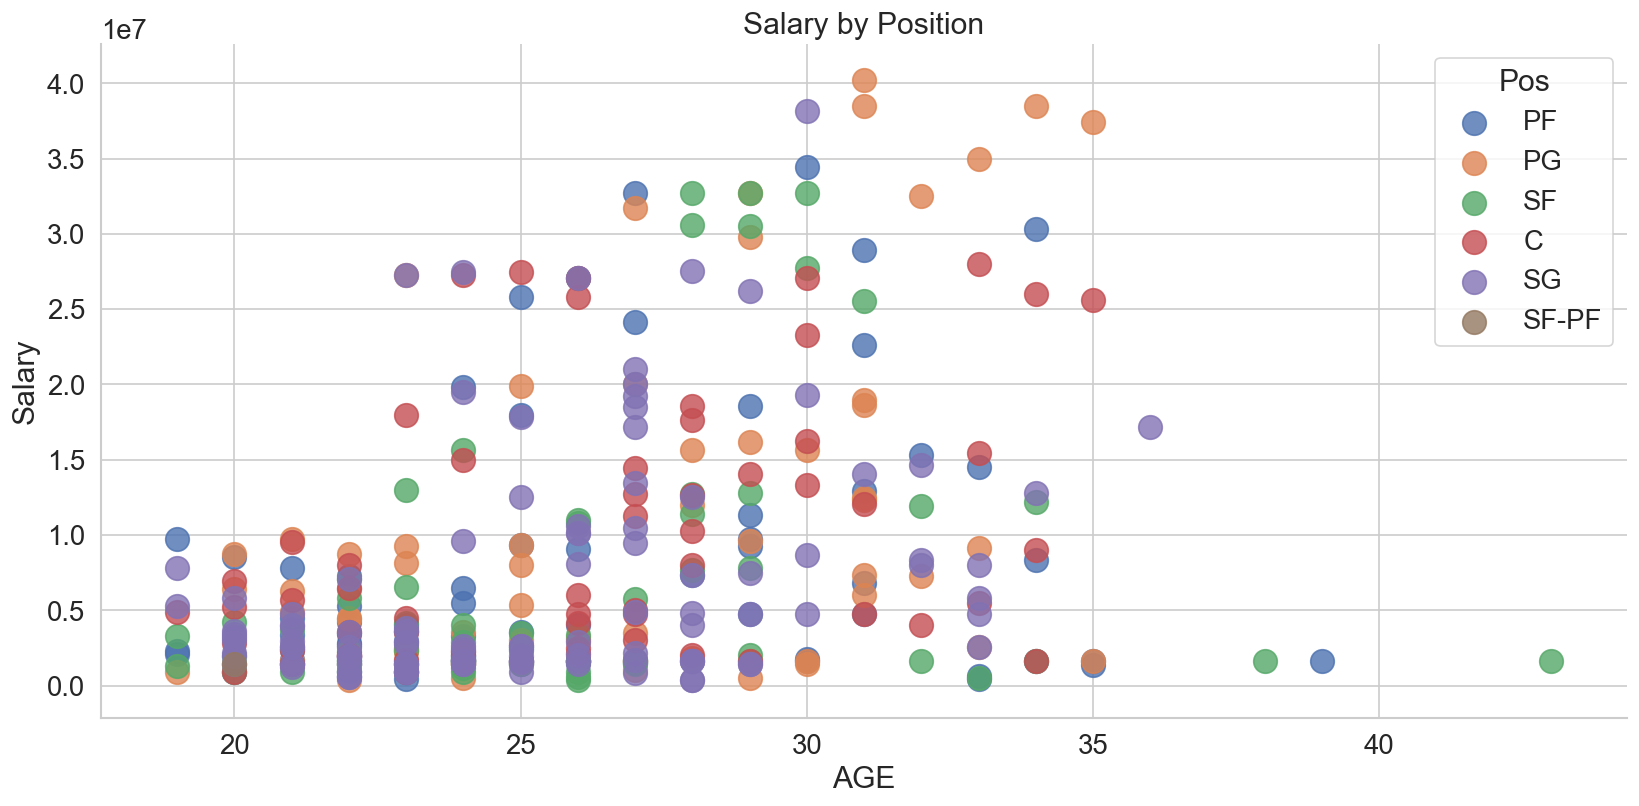

In [280]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.lmplot(x='Age', y='Salary', data=clear_players_salary, hue='Pos', fit_reg=False, aspect=2,size=7, legend=False, scatter_kws={"s": 200})
ax.set(xlabel='AGE', ylabel='Salary',title="Salary by Position")
plt.legend(loc='upper right', title='Pos')



In [281]:
### 

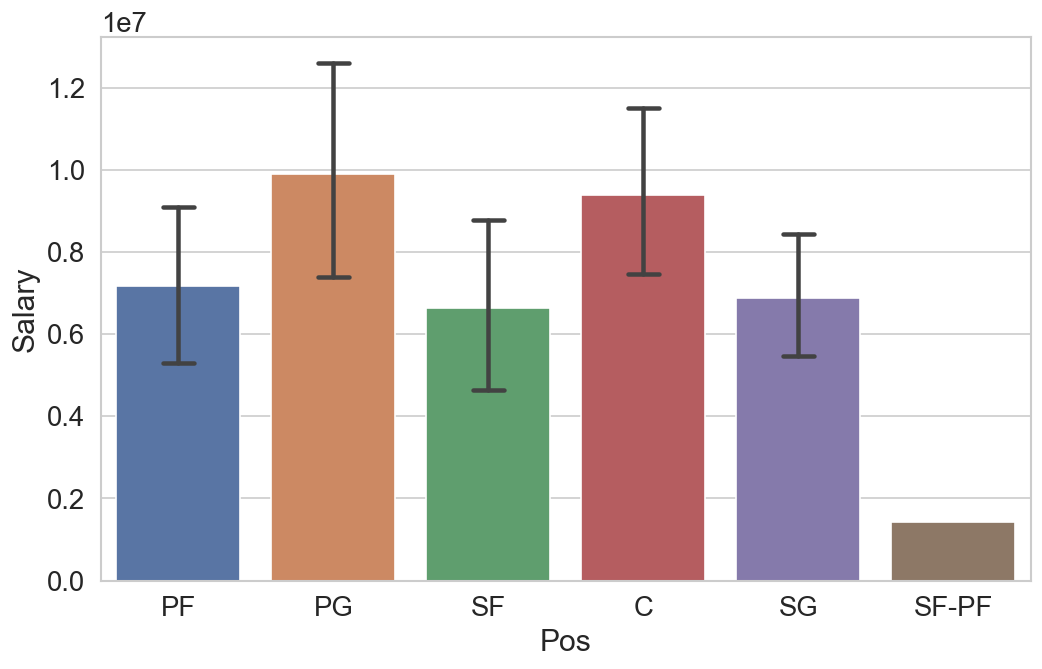

In [282]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Pos", y="Salary",data=clear_players_salary,capsize=.2)



In [283]:
### different postion has same view that most players get less 10milion

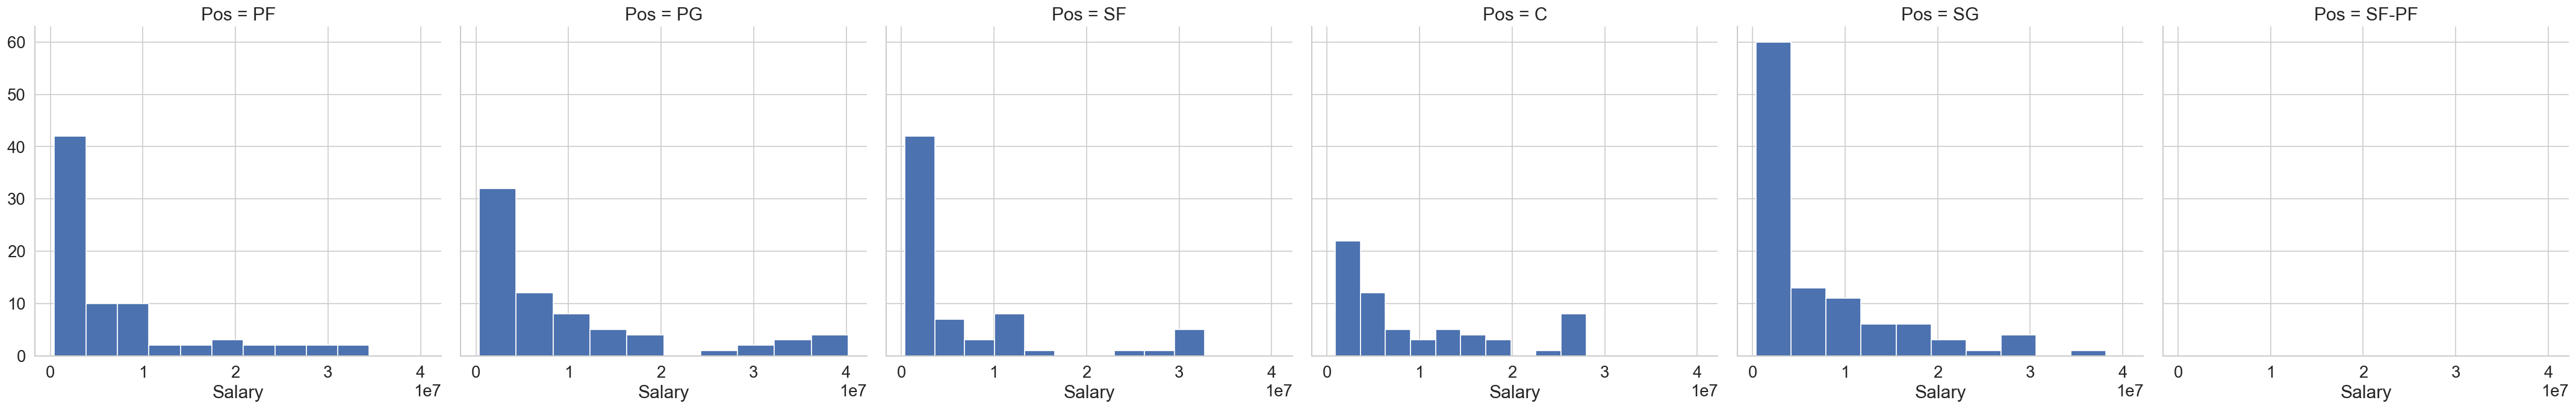

In [284]:
g = sns.FacetGrid(clear_players_salary, col="Pos", height=6)
g.map(plt.hist, "Salary")

# Feature Selection

In [285]:
#各参数与薪资相关性分析

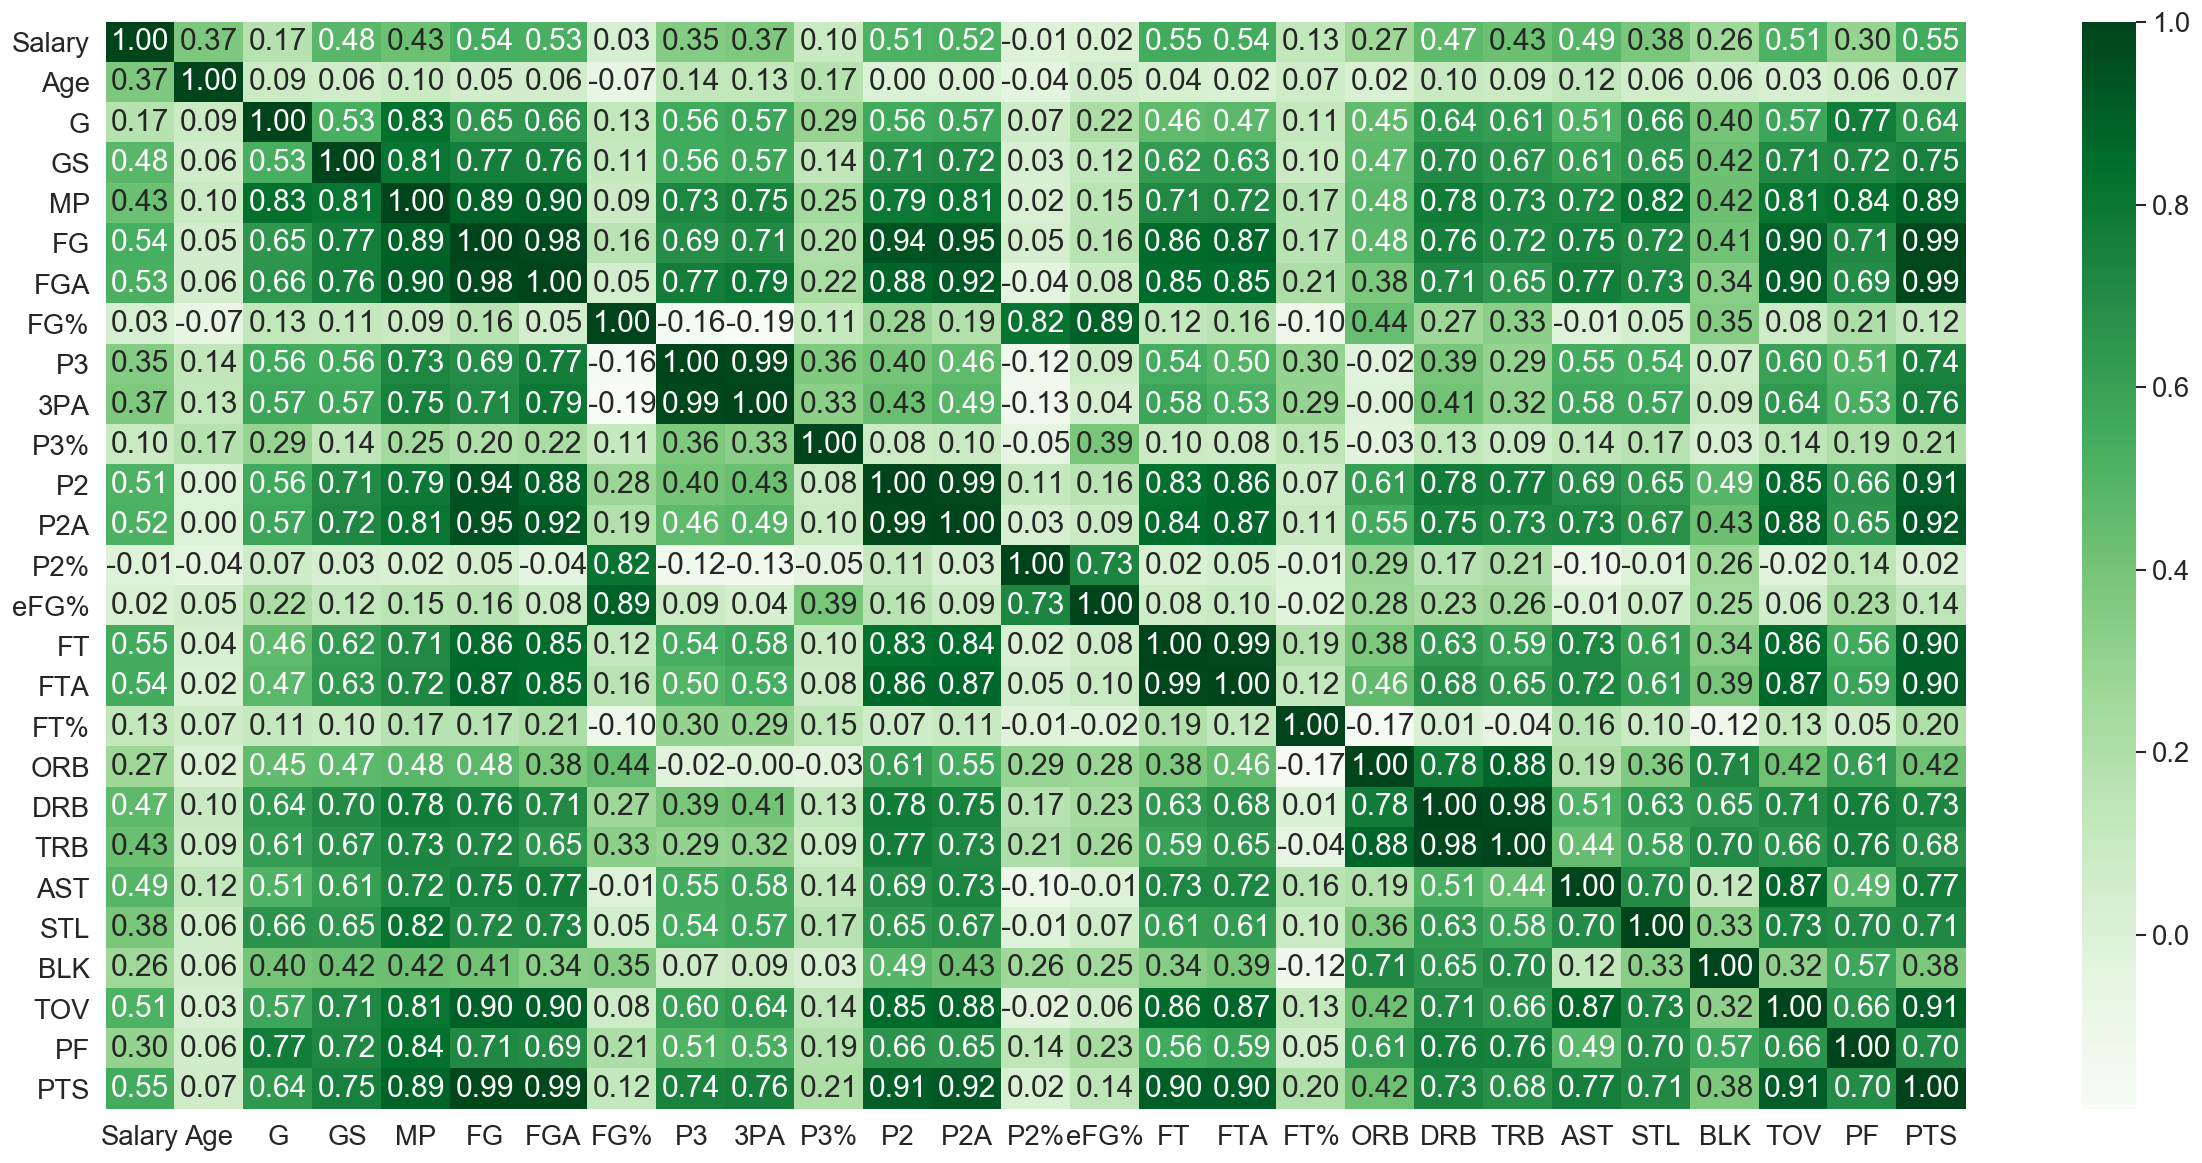

In [286]:
plt.figure(figsize=(25, 12))
sns.heatmap(clear_players_salary.corr(), annot=True, fmt=".2f", cmap=plt.cm.Greens)

In [287]:
clear_players_salary.columns
# len(clear_players_salary.columns)

Index(['Player', 'Salary', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', 'P3', '3PA', 'P3%', 'P2', 'P2A', 'P2%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

### There are some many feature for the dataset. I select 12 features which has strong relvant with salary


 'MP',Minutes Played Per Game 场均上场时间  
'FG', Field Goal Per Game   场均投篮命中
'FGA', Field Goal Attempts Per Game 场均投篮出手次数
'2PA',2-Point Field Goal Attempts Per Game 场均二分投篮出手次数 【2分球机会高于3分球】
'2P' 2-Point Field Goals Per Game 场均二分投篮命中次数
'FT',	Free Throw  Per Game  罚球命中次数 
'FTA' Free Throws Attempted per game 场均罚球次数
 'DRB' Defensive Rebounds Per Game 场均防守篮板 【仅与 防守篮板有关。。。】
 'AST' Assists Per Game 场均助攻 【助攻也很重要】
'TOV', turnovers Per Game	失误次数 
 PTS points per game  场均得分【这个最重要。。。0.63最高了】

In [288]:
# selected_df = clear_players_salary[['Salary','GS','MP','FG','3P','2P','FT','ORB','DRB','TOV','PF']]
selected_df = clear_players_salary[['Salary','MP','FG','FGA','P2A','P2','FT','FTA','DRB','AST','TOV','PTS']]
print(selected_df.shape)
selected_df.head()

(385, 12)


,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS
0,19863636.0,1914.0,314.0,726.0,500.0,246.0,137.0,203.0,338.0,215.0,94.0,833.0
1,2329200.0,1368.0,202.0,496.0,293.0,122.0,62.0,72.0,111.0,193.0,75.0,546.0
3,1618520.0,756.0,100.0,220.0,115.0,61.0,48.0,62.0,76.0,35.0,36.0,287.0
5,1000000.0,293.0,30.0,75.0,28.0,16.0,9.0,13.0,28.0,14.0,7.0,83.0
6,28000000.0,1848.0,289.0,654.0,390.0,200.0,55.0,73.0,320.0,244.0,65.0,722.0


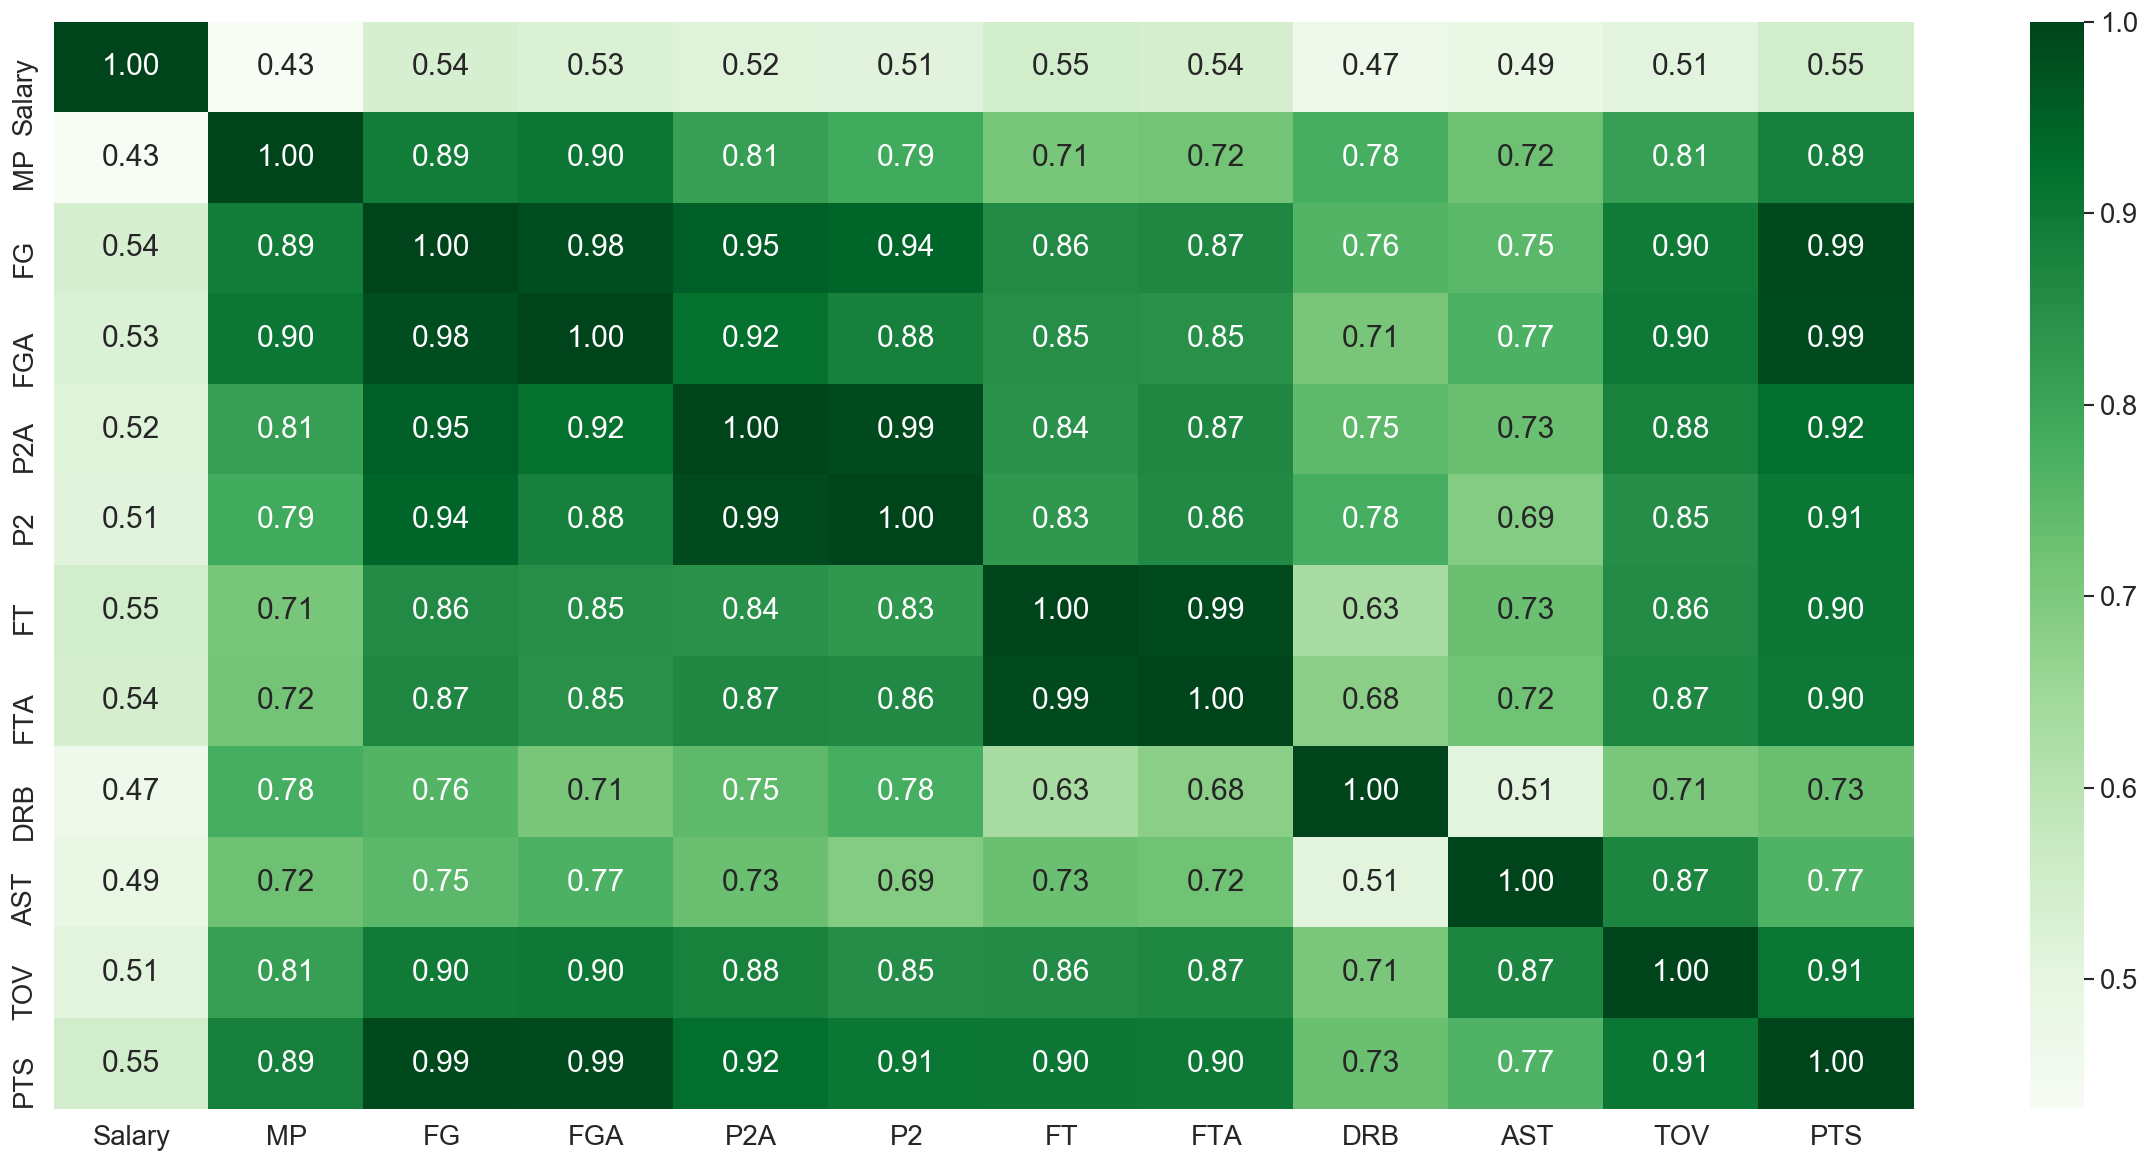

In [289]:
plt.figure(figsize=(25, 12))

sns.heatmap(selected_df.corr(), annot=True, fmt=".2f", cmap=plt.cm.Greens)


### It is quite hard find the relevant between salay with others.



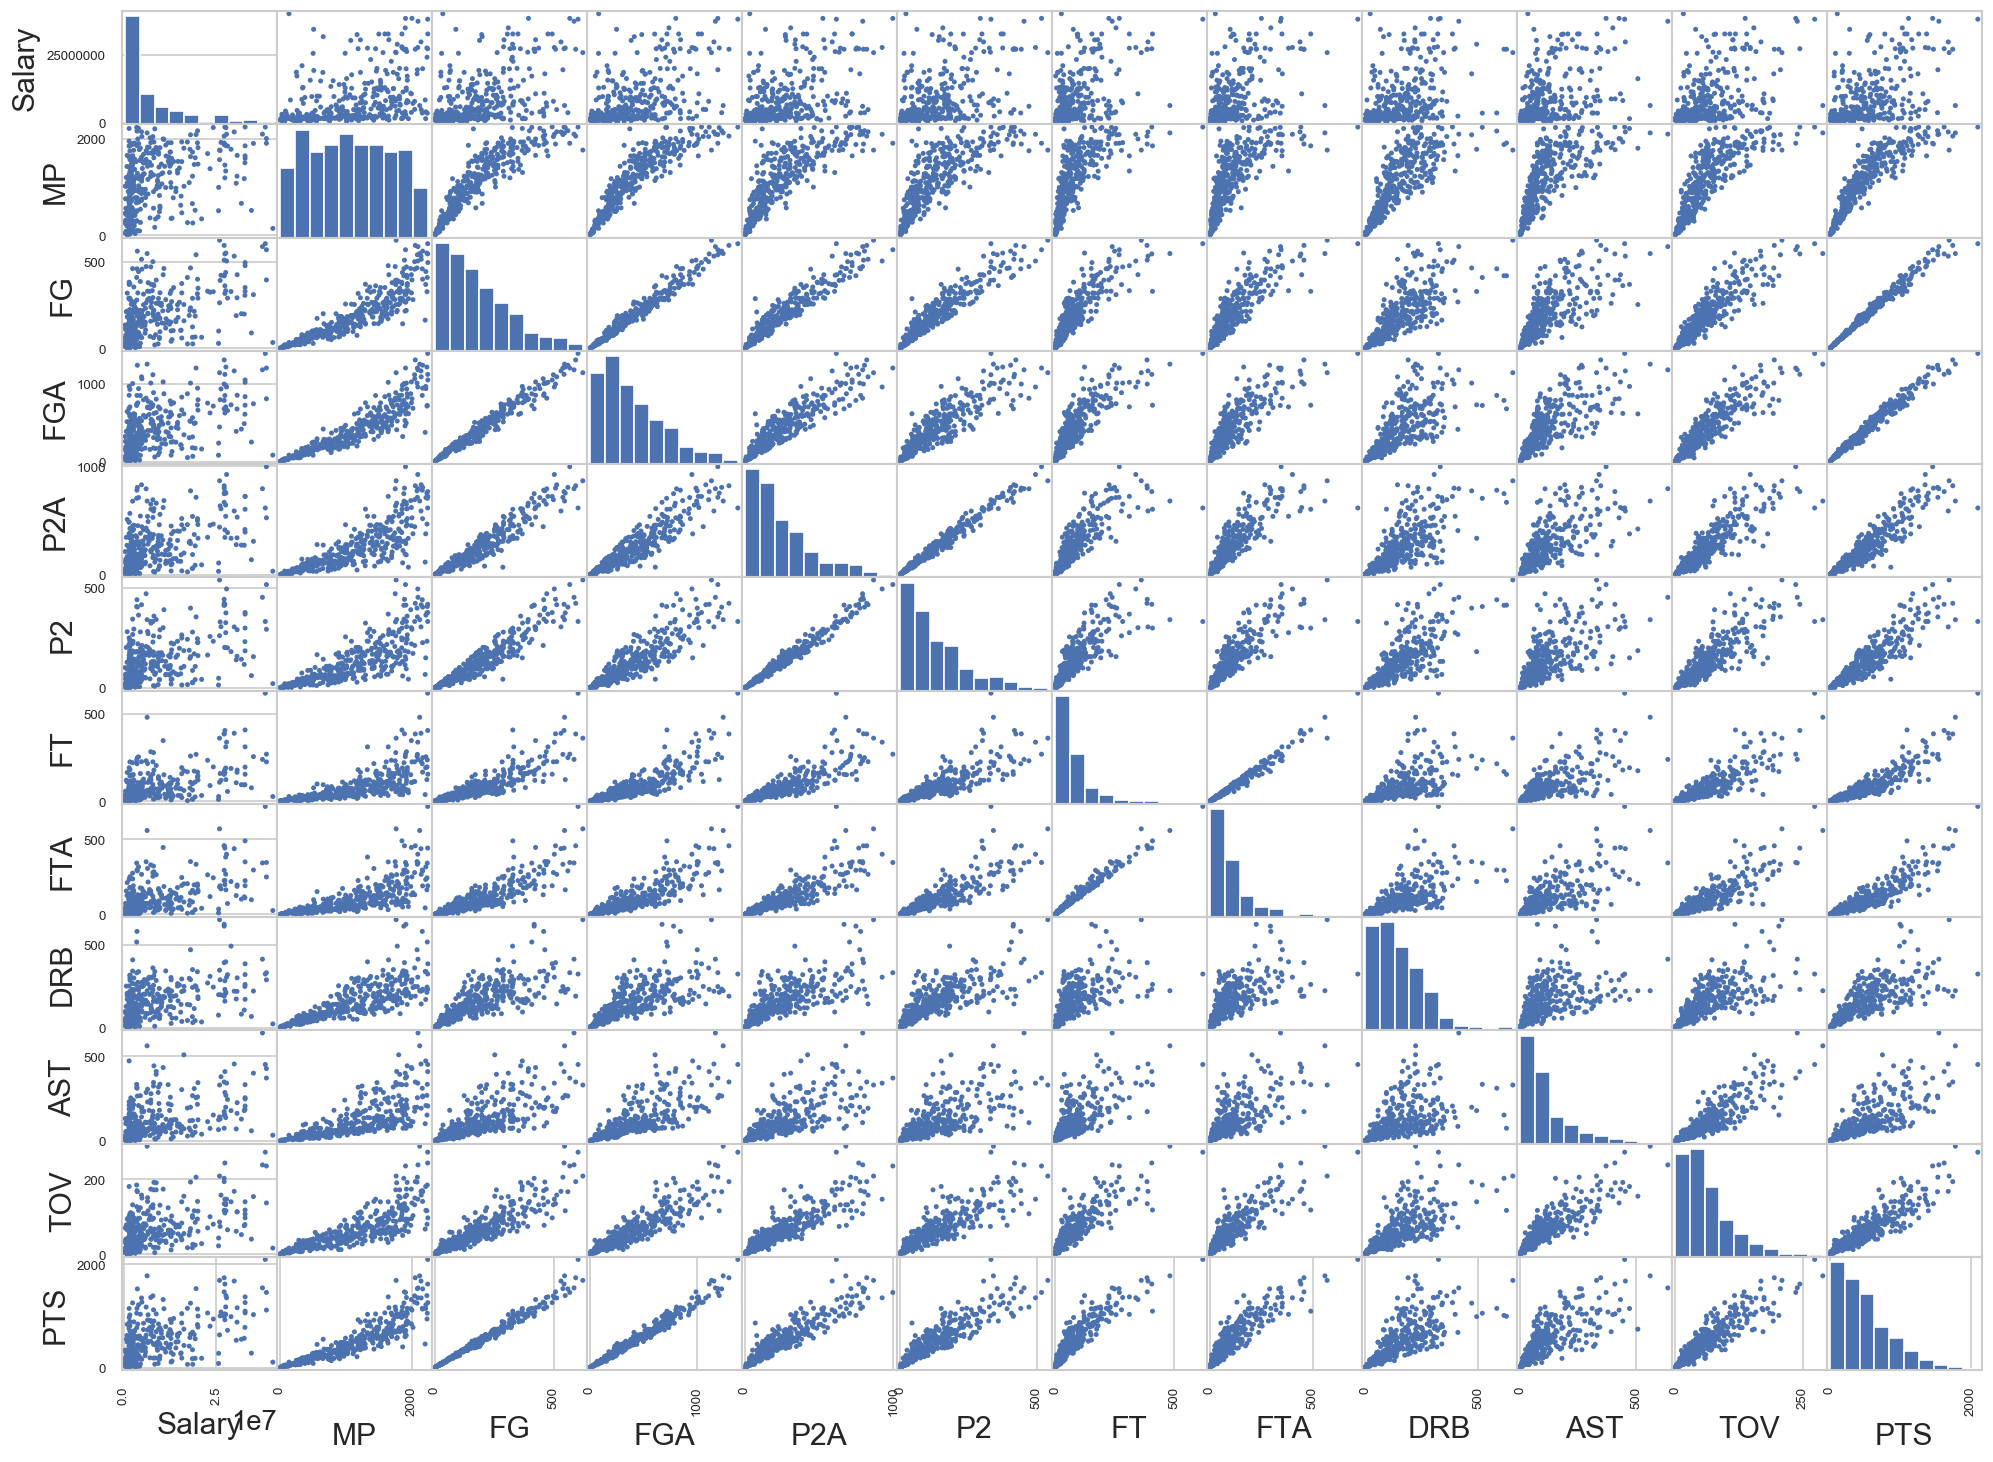

In [290]:
_ = pd.plotting.scatter_matrix(selected_df, alpha=1, figsize=(20, 15), diagonal='hist')

In [291]:
selected_df.cov()


,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS
Salary,8.144672e+13,2.401060e+09,6.725384e+08,1.407377e+09,9.637046e+08,5.100496e+08,4.228582e+08,5.143554e+08,4.635011e+08,4.728455e+08,2.320624e+08,1.930424e+09
MP,2.401060e+09,3.791254e+05,7.619616e+04,1.644180e+05,1.031793e+05,5.334937e+04,3.716848e+04,4.616114e+04,5.289757e+04,4.767644e+04,2.512147e+04,2.124076e+05
FG,6.725384e+08,7.619616e+04,1.923563e+04,4.036914e+04,2.729818e+04,1.435929e+04,1.012403e+04,1.257332e+04,1.163540e+04,1.113177e+04,6.253955e+03,5.347163e+04
FGA,1.407377e+09,1.644180e+05,4.036914e+04,8.747493e+04,5.618011e+04,2.876434e+04,2.135475e+04,2.616157e+04,2.306660e+04,2.437938e+04,1.337441e+04,1.136978e+05
P2A,9.637046e+08,1.031793e+05,2.729818e+04,5.618011e+04,4.262665e+04,2.242943e+04,1.481548e+04,1.870842e+04,1.699731e+04,1.615813e+04,9.120403e+03,7.428059e+04
P2,5.100496e+08,5.334937e+04,1.435929e+04,2.876434e+04,2.242943e+04,1.209203e+04,7.766287e+03,9.916576e+03,9.437698e+03,8.144429e+03,4.715513e+03,3.875213e+04
FT,4.228582e+08,3.716848e+04,1.012403e+04,2.135475e+04,1.481548e+04,7.766287e+03,7.221443e+03,8.788695e+03,5.926432e+03,6.642575e+03,3.663407e+03,2.982723e+04
FTA,5.143554e+08,4.616114e+04,1.257332e+04,2.616157e+04,1.870842e+04,9.916576e+03,8.788695e+03,1.094342e+04,7.856583e+03,8.088030e+03,4.566718e+03,3.659208e+04
DRB,4.635011e+08,5.289757e+04,1.163540e+04,2.306660e+04,1.699731e+04,9.437698e+03,5.926432e+03,7.856583e+03,1.216210e+04,6.016358e+03,3.908664e+03,3.139492e+04
AST,4.728455e+08,4.767644e+04,1.113177e+04,2.437938e+04,1.615813e+04,8.144429e+03,6.642575e+03,8.088030e+03,6.016358e+03,1.147141e+04,4.698615e+03,3.189345e+04


### save the dataset for modeling

In [292]:
selected_df.to_csv("fmanual_feature_Select_players_salary.csv.gz", compression='gzip')

In [293]:
selected_df.head()

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS
0,19863636.0,1914.0,314.0,726.0,500.0,246.0,137.0,203.0,338.0,215.0,94.0,833.0
1,2329200.0,1368.0,202.0,496.0,293.0,122.0,62.0,72.0,111.0,193.0,75.0,546.0
3,1618520.0,756.0,100.0,220.0,115.0,61.0,48.0,62.0,76.0,35.0,36.0,287.0
5,1000000.0,293.0,30.0,75.0,28.0,16.0,9.0,13.0,28.0,14.0,7.0,83.0
6,28000000.0,1848.0,289.0,654.0,390.0,200.0,55.0,73.0,320.0,244.0,65.0,722.0
